In [1]:
#EJERCICIO 1:

In [2]:
import os
os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd

from  fiona import listlayers

#mapa de peru
PeruMapas = 'https://github.com/thiagoDali/nuevoPais/raw/main/mapasPeru/PeruMapas.gpkg'

#layers in maps
listlayers(PeruMapas)

['ciudades',
 'areasUrbanasNacionales',
 'areasUrbanasPrivadas',
 'zonaAmortiguamiento']

In [3]:
ciudades               = gpd.read_file(PeruMapas, layer='ciudades')
areasUrbanasNacionales = gpd.read_file(PeruMapas, layer='areasUrbanasNacionales')
areasUrbanasPrivadas   = gpd.read_file(PeruMapas, layer='areasUrbanasPrivadas')
zonaAmortiguamiento    = gpd.read_file(PeruMapas, layer='zonaAmortiguamiento')

In [4]:
ciudades.crs.to_epsg() == areasUrbanasNacionales.crs.to_epsg() == areasUrbanasPrivadas.crs.to_epsg() == zonaAmortiguamiento.crs.to_epsg()

True

In [5]:
# país elegido: 
peru = gpd.read_file(os.path.join("mapas","DEPARTAMENTOS","DEPARTAMENTOS.shp"))

Text(0.5, 1.0, 'Mapa del Perú')

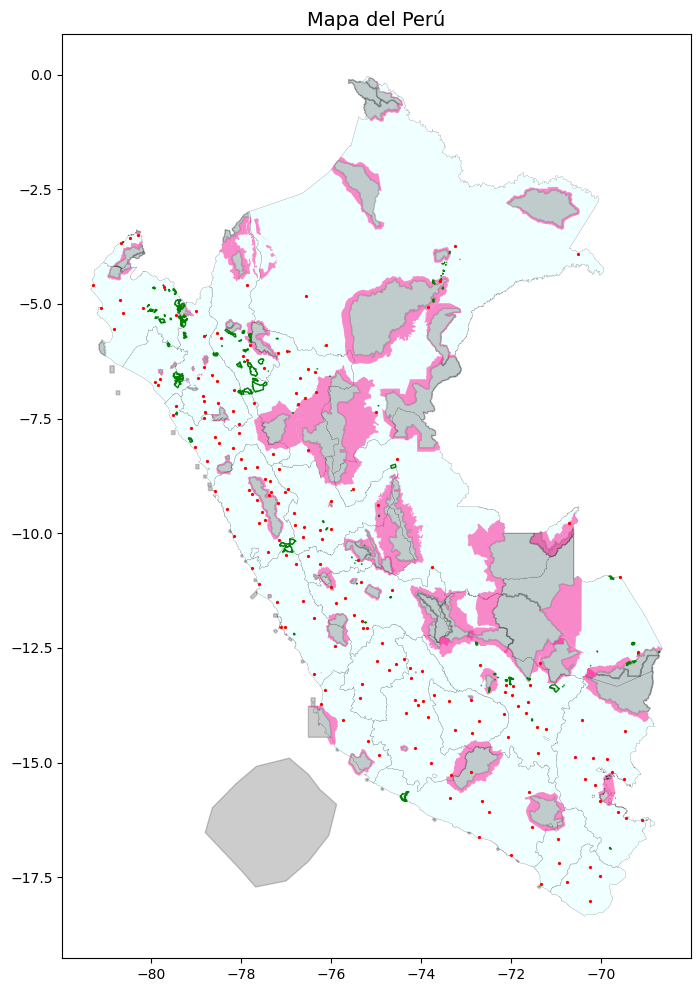

In [6]:
#cargamos la capa del archivo geopackage
capaPeru = gpd.read_file(PeruMapas)

# denominamos a nuestra imagen base como "baseMapa"
baseMapa = peru.geometry.plot(facecolor="azure", edgecolor='black', linewidth=0.1, figsize=(12,12))
areasUrbanasNacionales.plot(marker='p', color='black', markersize=3, edgecolor='black', linewidth=1, alpha=0.2, ax=baseMapa)
zonaAmortiguamiento.plot(marker='x', color='deeppink', markersize=7, alpha=0.5, ax=baseMapa)
areasUrbanasPrivadas.plot(marker='p', color='none', markersize=2, edgecolor='green', linewidth=1, alpha=1, ax=baseMapa)
ciudades.plot(marker='.', color='red', markersize=7, alpha=1, ax=baseMapa)

# agregamos título y leyenda a nuestro mapa del país: "Peru"
baseMapa.set_title("Mapa del Perú", fontsize=14)

In [7]:
#unidades tienen que estae en grados:
peru.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [8]:
#vemos el centroide de nuestro país elegido
peru.centroid

C:\Users\thiag\AppData\Local\Temp\ipykernel_5588\3600681548.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  peru.centroid


0      POINT (-78.05489 -5.07073)
1      POINT (-77.66997 -9.40702)
2     POINT (-72.97538 -14.02814)
3     POINT (-72.47623 -15.84292)
4     POINT (-74.08367 -14.08861)
5      POINT (-78.74544 -6.43300)
6     POINT (-77.12585 -11.94033)
7     POINT (-72.16934 -13.18788)
8     POINT (-75.00278 -13.02439)
9      POINT (-76.02561 -9.41620)
10    POINT (-75.57358 -14.23430)
11    POINT (-74.87907 -11.53821)
12     POINT (-78.36834 -7.92141)
13     POINT (-79.82689 -6.34056)
14    POINT (-76.62717 -11.78557)
15     POINT (-74.42636 -4.11981)
16    POINT (-70.53469 -11.98086)
17    POINT (-70.83842 -16.85983)
18    POINT (-75.29991 -10.39887)
19     POINT (-80.33598 -5.12800)
20    POINT (-69.95071 -14.92911)
21     POINT (-76.71503 -7.03417)
22    POINT (-70.27696 -17.64472)
23     POINT (-80.54458 -3.85635)
24     POINT (-73.43336 -9.61992)
dtype: geometry

In [9]:
#obtenemos el centroide del país
centroidePeru = peru.geometry.unary_union.centroid

#imprimimos las coordenadas del centroide del país
print(centroidePeru.x, centroidePeru.y)

-74.37649230842716 -9.142959101274242


In [10]:
#vemos que la projeccion "3587" tiene como unidad al "metro"
peru.to_crs(3587).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [11]:
#proyectamos las geometrías en la proyección EPSG 3587
peruProyectado3587 = peru.to_crs(3587)

#obtenemos el centroide del país proyectado
centroidePeruProyectado3587 = peruProyectado3587.geometry.unary_union.centroid

#imprimimos las coordenadas del centroide del país proyectado
print(centroidePeruProyectado3587.x, centroidePeruProyectado3587.y)

7687308.42785374 -6711127.303405803


<Axes: >

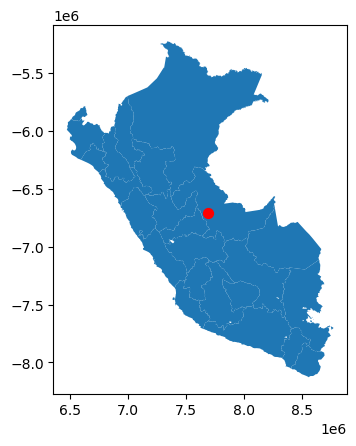

In [12]:
# ploteamos esta versión proyectada
basePeru3587 = peru.to_crs(3587).plot()
gpd.GeoSeries([centroidePeruProyectado3587]).plot(color='red', ax=basePeru3587, markersize=50)

In [13]:
#buscamos una proyeccion mucho más precisa, en el caso del peru, la mejor proyeccion es la "24891"

# recomendado para peru (metros)
peru.to_crs(24891).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [14]:
#proyectamos las geometrías en la proyección EPSG 24891
peruProyectado24891 = peru.to_crs(24891)

#obtenemos el centroide del país proyectado
centroidePeruProyectado24891 = peruProyectado24891.geometry.unary_union.centroid

#imprimimos las coordenadas del centroide del país proyectado
print(centroidePeruProyectado24891.x, centroidePeruProyectado24891.y)

893954.1561091122 1075368.18237618


<Axes: >

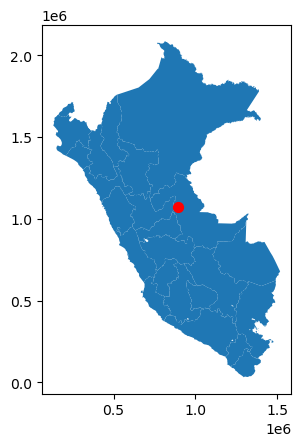

In [15]:
# ploteamos esta versión proyectada, la que es "mejor"
basePeru24891 = peru.to_crs(24891).plot()
gpd.GeoSeries([centroidePeruProyectado24891]).plot(color='red', ax=basePeru24891, markersize=50)

<Axes: title={'center': 'unprojected'}>

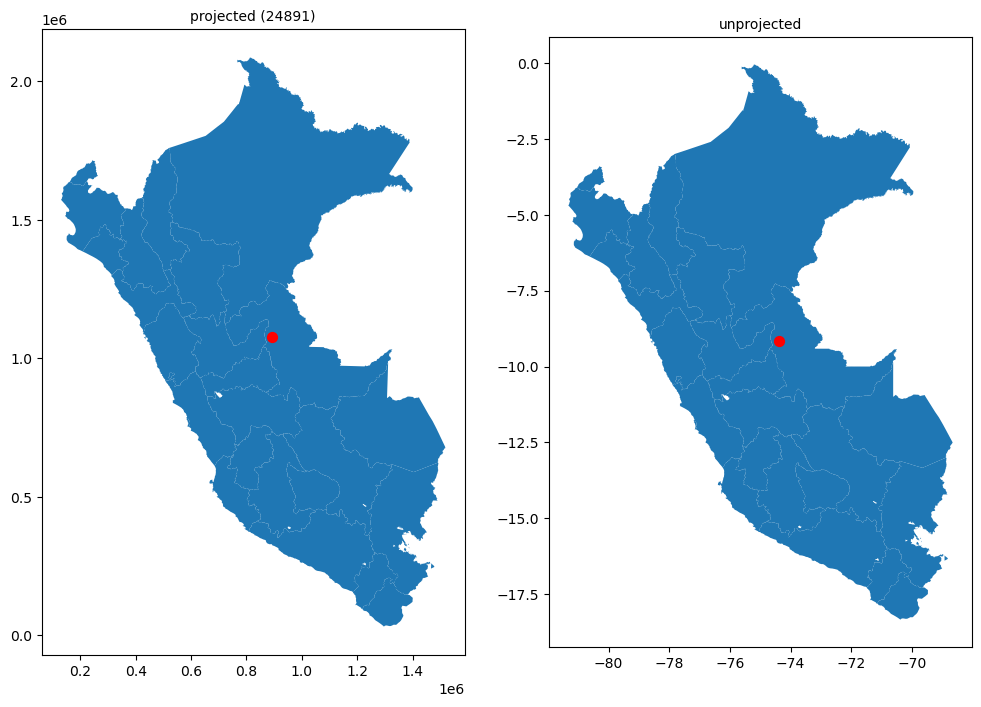

In [16]:
from matplotlib import pyplot

fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

ax1.set_title('projected (24891)',fontsize=10)
peru.to_crs(24891).plot(ax=ax1)
gpd.GeoSeries([centroidePeruProyectado24891]).plot(color='red', ax=ax1, markersize=50)

ax2.set_title('unprojected',fontsize=10)
peru.plot(ax=ax2)
gpd.GeoSeries([centroidePeru]).plot(color='red', ax=ax2, markersize=50)

In [17]:
#mantenemos la versión proyectada para todos nuestros mapas (con los listlayers)

#solo peru
peru_24891 = peru.to_crs(24891)

In [18]:
#guardamos el nuevo mapa de peru proyectado

import os

peru_24891.to_file(os.path.join("mapas","peruMapa24891_.gpkg"), driver="GPKG")

In [19]:
#EJERCICIO 2:

In [20]:
peru_24891

,IDDPTO,DEPARTAMEN,CAPITAL,FUENTE,geometry
0,01,AMAZONAS,CHACHAPOYAS,INEI,"POLYGON ((521118.719 1759677.970, 520983.400 1..."
1,02,ANCASH,HUARAZ,INEI,"POLYGON ((536816.193 1199347.308, 536840.804 1..."
2,03,APURIMAC,ABANCAY,INEI,"POLYGON ((955825.218 623900.023, 955891.961 62..."
3,04,AREQUIPA,AREQUIPA,INEI,"POLYGON ((1142815.277 454219.919, 1142827.492 ..."
4,05,AYACUCHO,AYACUCHO,INEI,"POLYGON ((892813.965 736732.980, 892640.468 73..."
5,06,CAJAMARCA,CAJAMARCA,INEI,"POLYGON ((421936.980 1578683.383, 422177.221 1..."
6,07,CALLAO,CALLAO,INEI,"POLYGON ((589063.851 781646.816, 589068.752 78..."
7,08,CUSCO,CUSCO,INEI,"POLYGON ((1046250.135 835843.020, 1046410.863 ..."
8,09,HUANCAVELICA,HUANCAVELICA,INEI,"POLYGON ((868905.489 758165.244, 868928.438 75..."
9,10,HUANUCO,HUANUCO,INEI,"POLYGON ((717843.575 1169511.790, 718047.737 1..."


In [21]:
peru_24891.boundary

0     LINESTRING (521118.719 1759677.970, 520983.400...
1     LINESTRING (536816.193 1199347.308, 536840.804...
2     LINESTRING (955825.218 623900.023, 955891.961 ...
3     MULTILINESTRING ((1142815.277 454219.919, 1142...
4     MULTILINESTRING ((892813.965 736732.980, 89264...
5     LINESTRING (421936.980 1578683.383, 422177.221...
6     LINESTRING (589063.851 781646.816, 589068.752 ...
7     MULTILINESTRING ((1046250.135 835843.020, 1046...
8     LINESTRING (868905.489 758165.244, 868928.438 ...
9     MULTILINESTRING ((717843.575 1169511.790, 7180...
10    LINESTRING (753163.545 651711.726, 753199.171 ...
11    LINESTRING (820822.621 904139.068, 820963.230 ...
12    LINESTRING (525363.065 1319546.936, 525488.942...
13    LINESTRING (290527.005 1483256.657, 290646.112...
14    MULTILINESTRING ((626813.833 715623.263, 62678...
15    LINESTRING (824164.933 2081588.657, 824745.778...
16    LINESTRING (1310711.869 953928.556, 1310190.89...
17    LINESTRING (1265312.762 298128.546, 126520

<Axes: >

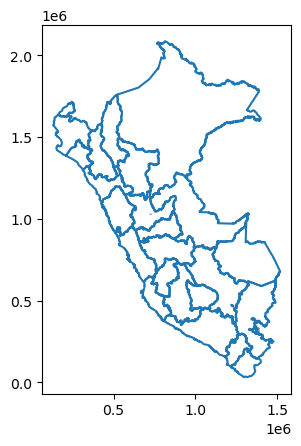

In [22]:
peru_24891.boundary.plot()

In [23]:
type(peru_24891.boundary)

geopandas.geoseries.GeoSeries

In [24]:
#como observamos, el código anterior nos sirvió para identificar que tipo de dato era y observamos que era una GeoSerie
peru_24891.boundary.to_frame()
#de este modo, transformaremos una GeoSerie en un GeoDataFrame

,0
0,"LINESTRING (521118.719 1759677.970, 520983.400..."
1,"LINESTRING (536816.193 1199347.308, 536840.804..."
2,"LINESTRING (955825.218 623900.023, 955891.961 ..."
3,"MULTILINESTRING ((1142815.277 454219.919, 1142..."
4,"MULTILINESTRING ((892813.965 736732.980, 89264..."
5,"LINESTRING (421936.980 1578683.383, 422177.221..."
6,"LINESTRING (589063.851 781646.816, 589068.752 ..."
7,"MULTILINESTRING ((1046250.135 835843.020, 1046..."
8,"LINESTRING (868905.489 758165.244, 868928.438 ..."
9,"MULTILINESTRING ((717843.575 1169511.790, 7180..."


In [25]:
#hacemos la conversión de GeoSerie a GeoDataFrame
peru_24891DF = peru_24891.boundary.to_frame() 

#nueva columna, la cual es opcional
peru_24891DF['name'] ='Perú' 

#renombramos la columna "geometry"
peru_24891DF.rename(columns={0:'geometry'},inplace=True) 

#establecemos el tipo de geometría, ya que con solo el nombre no basta
peru_24891DF = peru_24891DF.set_geometry("geometry")

# verifying:
peru_24891DF.crs

<Projected CRS: EPSG:24891>
Name: PSAD56 / Peru west zone
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Peru - west of 79°W.
- bounds: (-81.41, -8.32, -79.0, -3.38)
Coordinate Operation:
- name: Peru west zone
- method: Transverse Mercator
Datum: Provisional South American Datum 1956
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [26]:
#agregamos este GeoDatFrame como una capa
peru_24891DF.to_file(os.path.join("mapas","peruMapa24891_.gpkg"), layer='border', driver="GPKG")

In [27]:
#EJERCICIO 3:

In [28]:
#agregamos dos nuevos shapefiles, uno de limites distritales y otro de limites provinciales
limitesDistritales = gpd.read_file(os.path.join("mapas","DISTRITOS_inei_geogpsperu_suyopomalia","DISTRITOS_inei_geogpsperu_suyopomalia.shp"))
limitesProvinciales = gpd.read_file(os.path.join("mapas","PROVINCIAS_inei_geogpsperu_suyopomalia","PROVINCIAS_inei_geogpsperu_suyopomalia.shp"))

In [29]:
limitesDistritales.crs, limitesProvinciales.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

<Axes: >

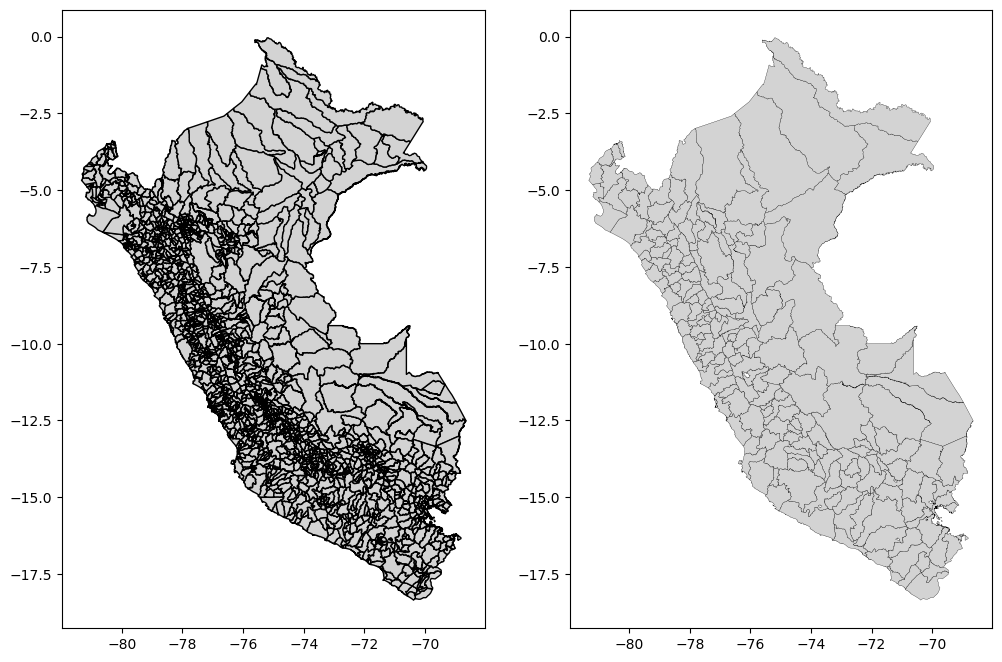

In [30]:
fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

limitesDistritales.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
limitesProvinciales.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [31]:
#printeamos y vemos los límites distritales
limitesDistritales

,UBIGEO,OBJECTID,NOMBDEP,NOMBPROV,NOMBDIST,CAPITAL,POBTOTAL,POB_EDAD_T,POB_EDAD_E,DENSIDAD,...,MUJERES__3,HOMBRES_NA,HOMBRES__2,TOTAL_NACI,IND_121951,IND_122042,IND_122047,IND_516462,IND_516484,geometry
0,100902,1.0,HUANUCO,PUERTO INCA,CODO DEL POZUZO,CODO DEL POZUZO,7768.0,5022.0,4329.0,2.338322,...,96.0,53.846154,112.0,208.0,37.0,11868.28878,9469.69031,75000.0,730.0,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,100904,2.0,HUANUCO,PUERTO INCA,TOURNAVISTA,TOURNAVISTA,6219.0,4162.0,3577.0,2.790716,...,63.0,51.908397,68.0,131.0,35.0,7746.84703,6279.18003,13500.0,1236.0,"POLYGON ((-75.20831 -9.10175, -75.20805 -9.101..."
2,250305,3.0,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,6085.0,4172.0,3616.0,31.892034,...,40.0,50.617284,41.0,81.0,53.0,3892.91357,3316.87044,43950.0,540.0,"POLYGON ((-74.95635 -8.79148, -74.95612 -8.792..."
3,250302,4.0,UCAYALI,PADRE ABAD,IRAZOLA,SAN ALEJANDRO,10941.0,7308.0,6368.0,10.952719,...,156.0,52.000000,169.0,325.0,176.0,11690.84202,11225.28471,125760.0,1366.0,"POLYGON ((-75.10843 -8.79990, -75.11753 -8.812..."
4,250304,5.0,UCAYALI,PADRE ABAD,NESHUYA,MONTE ALEGRE,9003.0,5983.0,5058.0,15.535539,...,0.0,0.000000,0.0,0.0,60.0,7432.20148,6834.75852,237441.0,691.0,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,100609,1870.0,HUANUCO,LEONCIO PRADO,PUEBLO NUEVO,PUEBLO NUEVO,4474.0,3126.0,2622.0,13.827847,...,0.0,0.000000,0.0,0.0,0.0,5250.23771,4666.05437,0.0,600.0,"POLYGON ((-76.21547 -9.13933, -76.21398 -9.138..."
1870,100610,1871.0,HUANUCO,LEONCIO PRADO,SANTO DOMINGO DE ANDA,PACAE,2752.0,1910.0,1618.0,9.705862,...,0.0,0.000000,0.0,0.0,21.0,2340.90471,2179.45723,45200.0,215.0,"POLYGON ((-76.09634 -9.02897, -76.09605 -9.028..."
1871,211105,1872.0,PUNO,SAN ROMAN,SAN MIGUEL,SAN MIGUEL,65422.0,47896.0,42210.0,537.126437,...,99.0,52.403846,109.0,208.0,0.0,19568.60311,15881.26813,0.0,2266.0,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."
1872,150806,1873.0,LIMA,HUAURA,HUAURA,HUAURA,37162.0,27907.0,23704.0,76.712838,...,276.0,54.530478,331.0,607.0,214.0,14412.21097,13111.55076,282300.0,1334.0,"POLYGON ((-77.32632 -10.90656, -77.32664 -10.9..."


In [32]:
#printeamos y vemos los límites provinciales
limitesProvinciales

,OBJECTID,NOMBDEP,IDPROV,CCPP,CCDD,NOMBPROV,FUENTE,POB_PROYEC,POBTOTAL,POB_EDAD_T,...,IND_121951,IND_122042,IND_122047,IND_516462,IND_516484,Shape_Leng,Shape_Area,Shape_Le_1,Shape_Ar_1,geometry
0,1.0,AMAZONAS,0101,01,01,CHACHAPOYAS,INEI - CPV2017,63188.0,60419.0,45859.0,...,317.0,38412.72138,57822.17436,994587.0,3403.0,4.623216,1.700899,3.861441,0.237710,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943..."
1,2.0,AMAZONAS,0102,02,01,BAGUA,INEI - CPV2017,84672.0,82193.0,56236.0,...,380.0,42202.67899,43717.28502,608750.0,6191.0,0.000000,0.000000,4.294735,0.472360,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510..."
2,3.0,AMAZONAS,0103,03,01,BONGARA,INEI - CPV2017,26830.0,27085.0,19924.0,...,178.0,26498.53565,22772.68373,425247.1,2304.0,0.000000,0.000000,3.038709,0.231318,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140..."
3,4.0,AMAZONAS,0104,04,01,CONDORCANQUI,INEI - CPV2017,51344.0,49800.0,27490.0,...,313.0,35232.84747,50694.06389,693920.0,7041.0,0.000000,0.000000,7.617350,1.455241,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990..."
4,5.0,AMAZONAS,0105,05,01,LUYA,INEI - CPV2017,47827.0,48140.0,34016.0,...,217.0,58723.65869,77973.52845,269838.0,4349.0,0.000000,0.000000,2.866386,0.270252,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,192.0,TUMBES,2403,03,24,ZARUMILLA,INEI - CPV2017,56038.0,51423.0,35645.0,...,422.0,78009.12834,56196.54914,2743795.0,2091.0,0.000000,0.000000,1.777982,0.061248,"POLYGON ((-80.28521 -3.41276, -80.28406 -3.412..."
192,193.0,UCAYALI,2501,01,25,CORONEL PORTILLO,INEI - CPV2017,447733.0,418055.0,286437.0,...,2786.0,208177.73599,229018.91841,13536326.0,28562.0,0.000000,0.000000,12.792065,3.157116,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277..."
193,194.0,UCAYALI,2502,02,25,ATALAYA,INEI - CPV2017,61049.0,57591.0,33561.0,...,498.0,93113.20035,78846.11470,1037387.5,8862.0,0.000000,0.000000,14.074691,3.217689,"POLYGON ((-73.18146 -9.41174, -73.13475 -9.411..."
194,195.0,UCAYALI,2503,03,25,PADRE ABAD,INEI - CPV2017,77044.0,70006.0,46619.0,...,686.0,97029.92792,105999.58513,1595127.0,5823.0,0.000000,0.000000,4.788007,0.764449,"POLYGON ((-75.43663 -8.22999, -75.43651 -8.230..."


In [33]:
#como estamos usando la proyeccion "24891" para peru
limitesProvinciales.to_crs(24891)

,OBJECTID,NOMBDEP,IDPROV,CCPP,CCDD,NOMBPROV,FUENTE,POB_PROYEC,POBTOTAL,POB_EDAD_T,...,IND_121951,IND_122042,IND_122047,IND_516462,IND_516484,Shape_Leng,Shape_Area,Shape_Le_1,Shape_Ar_1,geometry
0,1.0,AMAZONAS,0101,01,01,CHACHAPOYAS,INEI - CPV2017,63188.0,60419.0,45859.0,...,317.0,38412.72138,57822.17436,994587.0,3403.0,4.623216,1.700899,3.861441,0.237710,"POLYGON ((529451.076 1432687.657, 529593.833 1..."
1,2.0,AMAZONAS,0102,02,01,BAGUA,INEI - CPV2017,84672.0,82193.0,56236.0,...,380.0,42202.67899,43717.28502,608750.0,6191.0,0.000000,0.000000,4.294735,0.472360,"POLYGON ((430989.928 1591678.180, 431108.243 1..."
2,3.0,AMAZONAS,0103,03,01,BONGARA,INEI - CPV2017,26830.0,27085.0,19924.0,...,178.0,26498.53565,22772.68373,425247.1,2304.0,0.000000,0.000000,3.038709,0.231318,"POLYGON ((529706.587 1521603.787, 530148.163 1..."
3,4.0,AMAZONAS,0104,04,01,CONDORCANQUI,INEI - CPV2017,51344.0,49800.0,27490.0,...,313.0,35232.84747,50694.06389,693920.0,7041.0,0.000000,0.000000,7.617350,1.455241,"POLYGON ((521118.719 1759677.970, 520983.400 1..."
4,5.0,AMAZONAS,0105,05,01,LUYA,INEI - CPV2017,47827.0,48140.0,34016.0,...,217.0,58723.65869,77973.52845,269838.0,4349.0,0.000000,0.000000,2.866386,0.270252,"POLYGON ((484690.027 1437305.647, 484703.018 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,192.0,TUMBES,2403,03,24,ZARUMILLA,INEI - CPV2017,56038.0,51423.0,35645.0,...,422.0,78009.12834,56196.54914,2743795.0,2091.0,0.000000,0.000000,1.777982,0.061248,"POLYGON ((246113.049 1713256.626, 246240.857 1..."
192,193.0,UCAYALI,2501,01,25,CORONEL PORTILLO,INEI - CPV2017,447733.0,418055.0,286437.0,...,2786.0,208177.73599,229018.91841,13536326.0,28562.0,0.000000,0.000000,12.792065,3.157116,"POLYGON ((889068.677 1281653.341, 889169.852 1..."
193,194.0,UCAYALI,2502,02,25,ATALAYA,INEI - CPV2017,61049.0,57591.0,33561.0,...,498.0,93113.20035,78846.11470,1037387.5,8862.0,0.000000,0.000000,14.074691,3.217689,"POLYGON ((1028013.499 1041507.796, 1033182.698..."
194,195.0,UCAYALI,2503,03,25,PADRE ABAD,INEI - CPV2017,77044.0,70006.0,46619.0,...,686.0,97029.92792,105999.58513,1595127.0,5823.0,0.000000,0.000000,4.788007,0.764449,"POLYGON ((780746.328 1177098.865, 780760.223 1..."


In [34]:
limitesProvinciales.geometry

0      POLYGON ((-77.72614 -5.94354, -77.72486 -5.943...
1      POLYGON ((-78.61909 -4.51001, -78.61802 -4.510...
2      POLYGON ((-77.72759 -5.14030, -77.72361 -5.140...
3      POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...
4      POLYGON ((-78.13023 -5.90370, -78.13011 -5.904...
                             ...                        
191    POLYGON ((-80.28521 -3.41276, -80.28406 -3.412...
192    POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...
193    POLYGON ((-73.18146 -9.41174, -73.13475 -9.411...
194    POLYGON ((-75.43663 -8.22999, -75.43651 -8.230...
195    POLYGON ((-70.61380 -9.87339, -70.62140 -9.878...
Name: geometry, Length: 196, dtype: geometry

In [35]:
limitesDistritales.crs = "EPSG:4326"
limitesProvinciales.crs = "EPSG:4326"

In [36]:
#ahora podemos proyectarlo
limitesDistritales_24891 = limitesDistritales.to_crs(24891)
limitesProvinciales_24891 = limitesProvinciales.to_crs(24891)

In [37]:
#ahora podemos reproyectarlo, nuevamente
limitesDistritales_24891.to_file(os.path.join("mapas","peruMapa24891_.gpkg"), layer='limitesDistritales', driver="GPKG")
limitesProvinciales_24891.to_file(os.path.join("mapas","peruMapa24891_.gpkg"), layer='limitesProvinciales', driver="GPKG")

In [38]:
#EJERCICIO 4:

<Axes: title={'center': 'Below_Centroid, RightOf_Centroid'}>

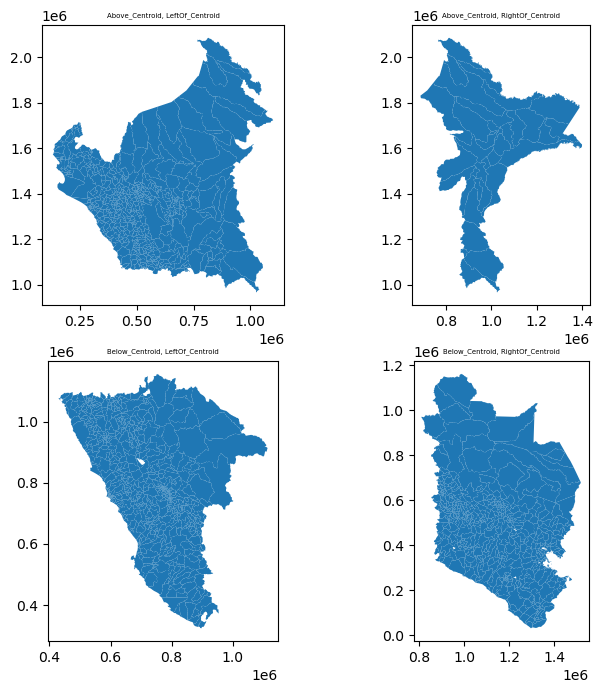

In [40]:
centroidePeruProyectado24891 = peruProyectado24891.geometry.unary_union.centroid

fig, axs = pyplot.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(8,8))

axs[0,0].set_title('Above_Centroid, LeftOf_Centroid', fontsize=5)
limitesDistritales_24891.cx[:centroidePeruProyectado24891.x,centroidePeruProyectado24891.y:].plot(ax=axs[0,0])

axs[0,1].set_title('Above_Centroid, RightOf_Centroid', fontsize=5)
limitesDistritales_24891.cx[centroidePeruProyectado24891.x:,centroidePeruProyectado24891.y:].plot(ax=axs[0,1])

axs[1,0].set_title('Below_Centroid, LeftOf_Centroid', fontsize=5)
limitesDistritales_24891.cx[:centroidePeruProyectado24891.x,:centroidePeruProyectado24891.y].plot(ax=axs[1,0])

axs[1,1].set_title('Below_Centroid, RightOf_Centroid', fontsize=5)
limitesDistritales_24891.cx[centroidePeruProyectado24891.x:,:centroidePeruProyectado24891.y].plot(ax=axs[1,1])

In [41]:
#a partir de ahora, podemos seleccionar un polígono de estos
limitesDistritales_24891.cx[:centroidePeruProyectado24891.x,centroidePeruProyectado24891.y:]

,UBIGEO,OBJECTID,NOMBDEP,NOMBPROV,NOMBDIST,CAPITAL,POBTOTAL,POB_EDAD_T,POB_EDAD_E,DENSIDAD,...,MUJERES__3,HOMBRES_NA,HOMBRES__2,TOTAL_NACI,IND_121951,IND_122042,IND_122047,IND_516462,IND_516484,geometry
1,100904,2.0,HUANUCO,PUERTO INCA,TOURNAVISTA,TOURNAVISTA,6219.0,4162.0,3577.0,2.790716,...,63.0,51.908397,68.0,131.0,35.0,7746.84703,6279.18003,13500.0,1236.0,"POLYGON ((804647.729 1079973.290, 804677.004 1..."
2,250305,3.0,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,6085.0,4172.0,3616.0,31.892034,...,40.0,50.617284,41.0,81.0,53.0,3892.91357,3316.87044,43950.0,540.0,"POLYGON ((832980.544 1114021.790, 833003.864 1..."
3,250302,4.0,UCAYALI,PADRE ABAD,IRAZOLA,SAN ALEJANDRO,10941.0,7308.0,6368.0,10.952719,...,156.0,52.000000,169.0,325.0,176.0,11690.84202,11225.28471,125760.0,1366.0,"POLYGON ((816164.325 1113331.771, 815138.905 1..."
4,250304,5.0,UCAYALI,PADRE ABAD,NESHUYA,MONTE ALEGRE,9003.0,5983.0,5058.0,15.535539,...,0.0,0.000000,0.0,0.0,60.0,7432.20148,6834.75852,237441.0,691.0,"POLYGON ((826952.810 1152450.269, 826956.414 1..."
5,250301,6.0,UCAYALI,PADRE ABAD,PADRE ABAD,AGUAYTIA,34819.0,23266.0,20053.0,7.425360,...,360.0,50.069348,361.0,721.0,277.0,65794.21809,76958.24566,1114976.0,2426.0,"POLYGON ((795631.986 1131508.515, 795576.829 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,100605,1867.0,HUANUCO,LEONCIO PRADO,LUYANDO,LUYANDO /8,9330.0,6440.0,5426.0,93.002392,...,102.0,49.753695,101.0,203.0,111.0,12877.33260,4876.93279,10740.0,900.0,"POLYGON ((717211.201 1074869.838, 717249.394 1..."
1867,100607,1868.0,HUANUCO,LEONCIO PRADO,PUCAYACU,PUCAYACU,3921.0,2614.0,2224.0,5.103143,...,0.0,0.000000,0.0,0.0,37.0,2531.23576,2344.12270,115885.0,398.0,"POLYGON ((722201.582 1147339.485, 722067.224 1..."
1868,100608,1869.0,HUANUCO,LEONCIO PRADO,CASTILLO GRANDE,CASTILLO GRANDE,13594.0,10018.0,8675.0,128.112336,...,0.0,0.000000,0.0,0.0,83.0,4460.13202,4546.68786,3168.0,480.0,"POLYGON ((709455.905 1077876.300, 709405.141 1..."
1869,100609,1870.0,HUANUCO,LEONCIO PRADO,PUEBLO NUEVO,PUEBLO NUEVO,4474.0,3126.0,2622.0,13.827847,...,0.0,0.000000,0.0,0.0,0.0,5250.23771,4666.05437,0.0,600.0,"POLYGON ((693529.864 1077277.346, 693695.295 1..."


In [42]:
#asignamos una variable a los límites distritales proyectados
peru_arribaIzquierda = limitesDistritales_24891.cx[:centroidePeruProyectado24891.x,centroidePeruProyectado24891.y:].dissolve()

#printeamos la variable que acabamos de asignar
peru_arribaIzquierda

,geometry,UBIGEO,OBJECTID,NOMBDEP,NOMBPROV,NOMBDIST,CAPITAL,POBTOTAL,POB_EDAD_T,POB_EDAD_E,...,MUJERES_NA,MUJERES__3,HOMBRES_NA,HOMBRES__2,TOTAL_NACI,IND_121951,IND_122042,IND_122047,IND_516462,IND_516484
0,"POLYGON ((296722.163 1318920.213, 296575.879 1...",100904,2.0,HUANUCO,PUERTO INCA,TOURNAVISTA,TOURNAVISTA,6219.0,4162.0,3577.0,...,48.091603,63.0,51.908397,68.0,131.0,35.0,7746.84703,6279.18003,13500.0,1236.0


In [44]:
#como solo la columna de geometría está bien, arreglamos el resto
peru_arribaIzquierda['zone']='NW'
peru_arribaIzquierda = peru_arribaIzquierda.loc[:,['NOMBDEP','zone','geometry']]   
peru_arribaIzquierda

,NOMBDEP,zone,geometry
0,HUANUCO,NW,"POLYGON ((296722.163 1318920.213, 296575.879 1..."


<Axes: >

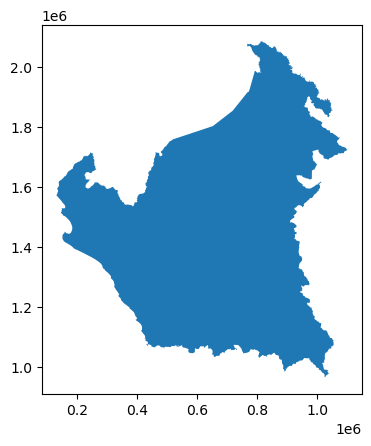

In [45]:
#ploteamos el recorte de la parte "NW" del peru
peru_arribaIzquierda.plot()

In [46]:
#tenemos en cuenta que con CX no hay una partición perfecta
rowsCX = (limitesDistritales_24891.cx[:centroidePeruProyectado24891.x,centroidePeruProyectado24891.y:].shape[0],\
limitesDistritales_24891.cx[centroidePeruProyectado24891.x:,centroidePeruProyectado24891.y:].shape[0],\
limitesDistritales_24891.cx[:centroidePeruProyectado24891.x,:centroidePeruProyectado24891.y].shape[0],\
limitesDistritales_24891.cx[centroidePeruProyectado24891.x:,:centroidePeruProyectado24891.y].shape[0])
sum(rowsCX)

1965

In [47]:
#por tanto, tenemos polígonos duplicados en las zonas
sum(rowsCX)-limitesDistritales_24891.shape[0]

91

In [48]:
#EJERCICIO 5: